# Benchmarks

## Initialize

In [1]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘pac

In [2]:
base_path = "/home/jakobs"

project_path = glue("{base_path}/data")
experiment = '230629'
experiment_path = glue("{project_path}/{experiment}")

endpoints_md = endpoint_defs = arrow::read_feather(glue("{base_path}/data/endpoints_epic_md.feather")) %>% filter(n_epic>=100)
endpoints_md_all = arrow::read_feather(glue("{base_path}/data/endpoints_md.feather")) 
endpoints = endpoint_defs$endpoint

In [3]:
library(data.table)
library(arrow)

In [4]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401",	#Hypertension"  
    "phecode_404", # Ischemic heart disease   
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure

    
    "phecode_059-1", # COVID 19
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
      
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease    
    "phecode_542", # Chronic liver disease and sequelae    
    "OMOP_4306655" # All-Cause Death
    
    # also generally important and relevant
    #"phecode_440-3", # Pulmonary embolism
    #"phecode_468-1",	#Viral pneumonia
#     "phecode_460-2",	#Acute lower respiratory infection
    #"phecode_388" # Blindness and low vision
      # generally important and fun to check
   # "phecode_374-3", # Retinal vascular changes and occlusions
    #"phecode_665", # Psoriasis
#     "phecode_121", # Leukemia
    # important for eye
#     "phecode_705-1", # Rheumatoid arthritis
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [5]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

In [6]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = experiment

In [7]:
eligable_eids = arrow::read_feather(glue("{experiment_path}/eligible_eids_long_{today}.feather")) %>% 
    mutate(included = 1) %>% mutate(eid = as.character(eid))
#eligable_eids$eid = as.numeric(levels(eligable_eids$eid))[eligable_eids$eid]

In [8]:
data_outcomes = arrow::read_feather(glue("{base_path}/data/data_outcomes_long_230320.feather", as_data_frame=FALSE)) 

In [9]:
partitions = 0:9
paths = c()
for (p in partitions){
    #temp_path = glue("{experiment_path}/loghs/Identity(Records)+MLP/{p}/test.feather")
    temp_path = glue("{experiment_path}/loghs/RetinaUKB/{p}/test.feather")
    paths = c(paths, temp_path)
    }

In [10]:
read_predictions = function(paths, endpoint_list){
    predictions = paths %>% map_df(
        ~suppressWarnings(read_feather(., col_select=c("eid", all_of(endpoint_list)))) %>% 
        pivot_longer(all_of(endpoint_list), names_to="endpoint", values_to="logh") %>%
        mutate(eid = as.character(eid)) %>%
        select(endpoint, eid, logh))# %>% arrange(endpoint, eid)
    return(predictions)
    }

map <- c(`1` = 'top10',
            `2` = 'rest',
         `3` = 'rest',
         `4` = 'rest',
         `5` = 'rest',
         `6` = 'rest',
         `7` = 'rest',
         `8` = 'rest',
         `9` = 'rest',
         `10` = 'rest')

calc_ratios = function(pred_outcomes, endpoints_md){
    
    logh_inc = pred_outcomes %>% 
        filter(included==1) %>% 
        group_by(endpoint) %>% 
        mutate(logh_perc = ntile(logh, 10)) %>% 
#         mutate(logh_perc=case_when(logh_perc %in% 1:9 ~ 1, 
#                                     logh_perc %in% 10:11 ~ 10,
#                                     TRUE ~ "NA")) %>%
        ungroup()

    logh_T_agg = logh_inc %>% group_by(endpoint, logh_perc) %>% summarise(n=sum(event, na.rm=TRUE), event_rate = mean(event)) #%>% as_tibble()
    temp_ordered = logh_T_agg %>% mutate(endpoint = factor(endpoint, levels=endpoint_defs$endpoint)) 
    temp_ratios = temp_ordered %>% #filter(logh_perc %in% c(1, 10)) %>% 
        pivot_wider(names_from=logh_perc, values_from=c(n, event_rate)) %>% 
        mutate(event_rate_ratio=event_rate_10/event_rate_1) %>%
#             mutate(ratio=ratio_top10/ratio_rest) %>%

        #mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>%
        #select(endpoint, n_1, n_10, event_rate_1, ratio_10, ratio) %>%
#             select(endpoint, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

        arrange(event_rate_ratio) #%>% as_tibble()
    return(temp_ratios)
    }

In [11]:
prepare_ratios = function(endpoint_list){
    
    temp_outcomes = data_outcomes %>% filter(endpoint %in% endpoint_list)
    temp_eligability = eligable_eids %>% filter(endpoint %in% endpoint_list)
    temp_outcomes_eligability = temp_outcomes %>% left_join(temp_eligability, by=c("eid", "endpoint"))
    pred_outcomes = read_predictions(paths, endpoint_list) %>% left_join(temp_outcomes_eligability, by=c("eid", "endpoint")) %>% as_tibble()
    temp_df = calc_ratios(pred_outcomes, endpoints_md)
    
    return(temp_df)
    }

In [12]:
ep_chunks = split(endpoint_defs$endpoint, ceiling(seq_along(endpoint_defs$endpoint)/500))

In [13]:
ratio_dfs = c()
for (i in 1:length(ep_chunks)){
    endpoint_list = ep_chunks[[i]]
    ratio_dfs[[i]] = prepare_ratios(endpoint_list)
    print(ratio_dfs[[i]])
    flush.console()
}

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


# A tibble: 172 × 22
# Groups:   endpoint [172]
   endpoint    n_1   n_2   n_3   n_4   n_5   n_6   n_7   n_8   n_9  n_10 event…¹
   <fct>     <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
 1 phecode_…    30    40    27    35    35    35    36    32    27    20  0.0430
 2 phecode_…    22    22    28    34    42    38    27    42    25    15  0.0308
 3 phecode_…    12    17    15    18    16    15    18    13    12     9  0.0166
 4 phecode_…    18    16    19    19    11    18    19    23     8    14  0.0249
 5 phecode_…    33    27    29    30    28    46    36    50    43    31  0.111 
 6 phecode_…     9     6    13    11    12    10     9    12    10     9  0.0126
 7 phecode_…    41    60    65    63    49    45    45    48    44    49  0.0576
 8 phecode_…    19    20    20    20    25    28    34    31    30    23  0.0277
 9 phecode_…    19    19    17    25    19    18    32    20    27    24  0.0607
10 phecode_…    43    51    56    40    49    55    59    50 

In [14]:
ratio_df_complete = bind_rows(ratio_dfs) %>% ungroup() %>%
    mutate(endpoint_string = recode(endpoint, !!!endpoint_map)) %>% 
    #select(endpoint, endpoint_string, n_1, n_10, ratio_1, ratio_10, ratio) %>%
#     select(endpoint, endpoint_string, n_top10, n_rest, ratio_top10, ratio_rest, ratio) %>%

    arrange(event_rate_ratio) %>% left_join(endpoint_defs %>% select(endpoint, n_epic, phecode_category) %>% as_tibble(), by="endpoint") 

ratio_df_complete

endpoint,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,⋯,event_rate_5,event_rate_6,event_rate_7,event_rate_8,event_rate_9,event_rate_10,event_rate_ratio,endpoint_string,n_epic,phecode_category
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<chr>
phecode_136,30,40,27,35,35,35,36,32,27,⋯,0.050287356,0.05028736,0.051724138,0.045977011,0.038793103,0.028735632,0.6676245,Benign neoplasm of the digestive organs,361,Neoplasms
phecode_532,22,22,28,34,42,38,27,42,25,⋯,0.058823529,0.05322129,0.037815126,0.058823529,0.035014006,0.021037868,0.6827744,Other disorders of the intestines,313,GI
phecode_439,12,17,15,18,16,15,18,13,12,⋯,0.022068966,0.02068966,0.024827586,0.017931034,0.016574586,0.012430939,0.7510359,Hemorrhoids,145,Cardio
phecode_116-1,18,16,19,19,11,18,19,23,8,⋯,0.015256588,0.02496533,0.026352288,0.031900139,0.011095700,0.019417476,0.7788565,Secondary malignancy of lymph nodes,170,Neoplasms
phecode_600,33,27,29,30,28,46,36,50,43,⋯,0.094915254,0.15593220,0.122033898,0.169491525,0.145762712,0.105084746,0.9425783,Benign prostatic hyperplasia,435,Genitourinary
phecode_138,9,6,13,11,12,10,9,12,10,⋯,0.016806723,0.01400560,0.012605042,0.016830295,0.014025245,0.012622721,1.0014025,Benign neoplasm of the skin,104,Neoplasms
phecode_556,41,60,65,63,49,45,45,48,44,⋯,0.068917018,0.06329114,0.063291139,0.067510549,0.061884669,0.068917018,1.1968029,Other symptoms involving the digestive system and abdomen,527,GI
phecode_593,19,20,20,20,25,28,34,31,30,⋯,0.036496350,0.04087591,0.049635036,0.045321637,0.043859649,0.033625731,1.2122961,Hematuria,286,Genitourinary
phecode_107,19,19,17,25,19,18,32,20,27,⋯,0.060702875,0.05750799,0.102564103,0.064102564,0.086538462,0.076923077,1.2672065,Malignant neoplasm of male genitalia,247,Neoplasms


In [15]:
options(pillar.print_max = Inf)
ratio_df_complete %>% 
    arrange(event_rate_ratio) %>%
    mutate_if(is.numeric, round, 3) %>%
    write_csv(glue("outputs/EPIC_EventRates_PhenomeWide.csv"))

In [16]:
nrow(ratio_df_complete)

[1] 172

In [17]:
# 0.66:
for (t in c(1, 3, 5, 10, 50)){
     n = nrow(ratio_df_complete %>% filter(event_rate_ratio > t))
     freq = round(n*100/nrow(ratio_df_complete))
     print(glue("nrows with rate ratio > {t}: {n} ({freq}%)"))
}

nrows with rate ratio > 1: 167 (97%)
nrows with rate ratio > 3: 108 (63%)
nrows with rate ratio > 5: 67 (39%)
nrows with rate ratio > 10: 26 (15%)
nrows with rate ratio > 50: 1 (1%)


In [18]:
ratio_df_complete %>% 
    select(endpoint, endpoint_string, n_epic, phecode_category, event_rate_ratio)%>% filter(n_epic>50) %>% arrange(event_rate_ratio)
#%>% filter(event_rate_ratio <= 1.5) 

endpoint,endpoint_string,n_epic,phecode_category,event_rate_ratio
<chr>,<fct>,<int>,<chr>,<dbl>
phecode_136,Benign neoplasm of the digestive organs,361,Neoplasms,0.6676245
phecode_532,Other disorders of the intestines,313,GI,0.6827744
phecode_439,Hemorrhoids,145,Cardio,0.7510359
phecode_116-1,Secondary malignancy of lymph nodes,170,Neoplasms,0.7788565
phecode_600,Benign prostatic hyperplasia,435,Genitourinary,0.9425783
phecode_138,Benign neoplasm of the skin,104,Neoplasms,1.0014025
phecode_556,Other symptoms involving the digestive system and abdomen,527,GI,1.1968029
phecode_593,Hematuria,286,Genitourinary,1.2122961
phecode_107,Malignant neoplasm of male genitalia,247,Neoplasms,1.2672065


In [19]:
#ratio_df_complete %>% filter(event_rate_ratio<10) %>% arrange(desc(ratio_1)) #%>% filter(!str_detect(endpoint, "-"))

In [20]:
base_size = 8
title_size = 10
facet_size = 8.5
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2)))

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


## Nice overview over all categories

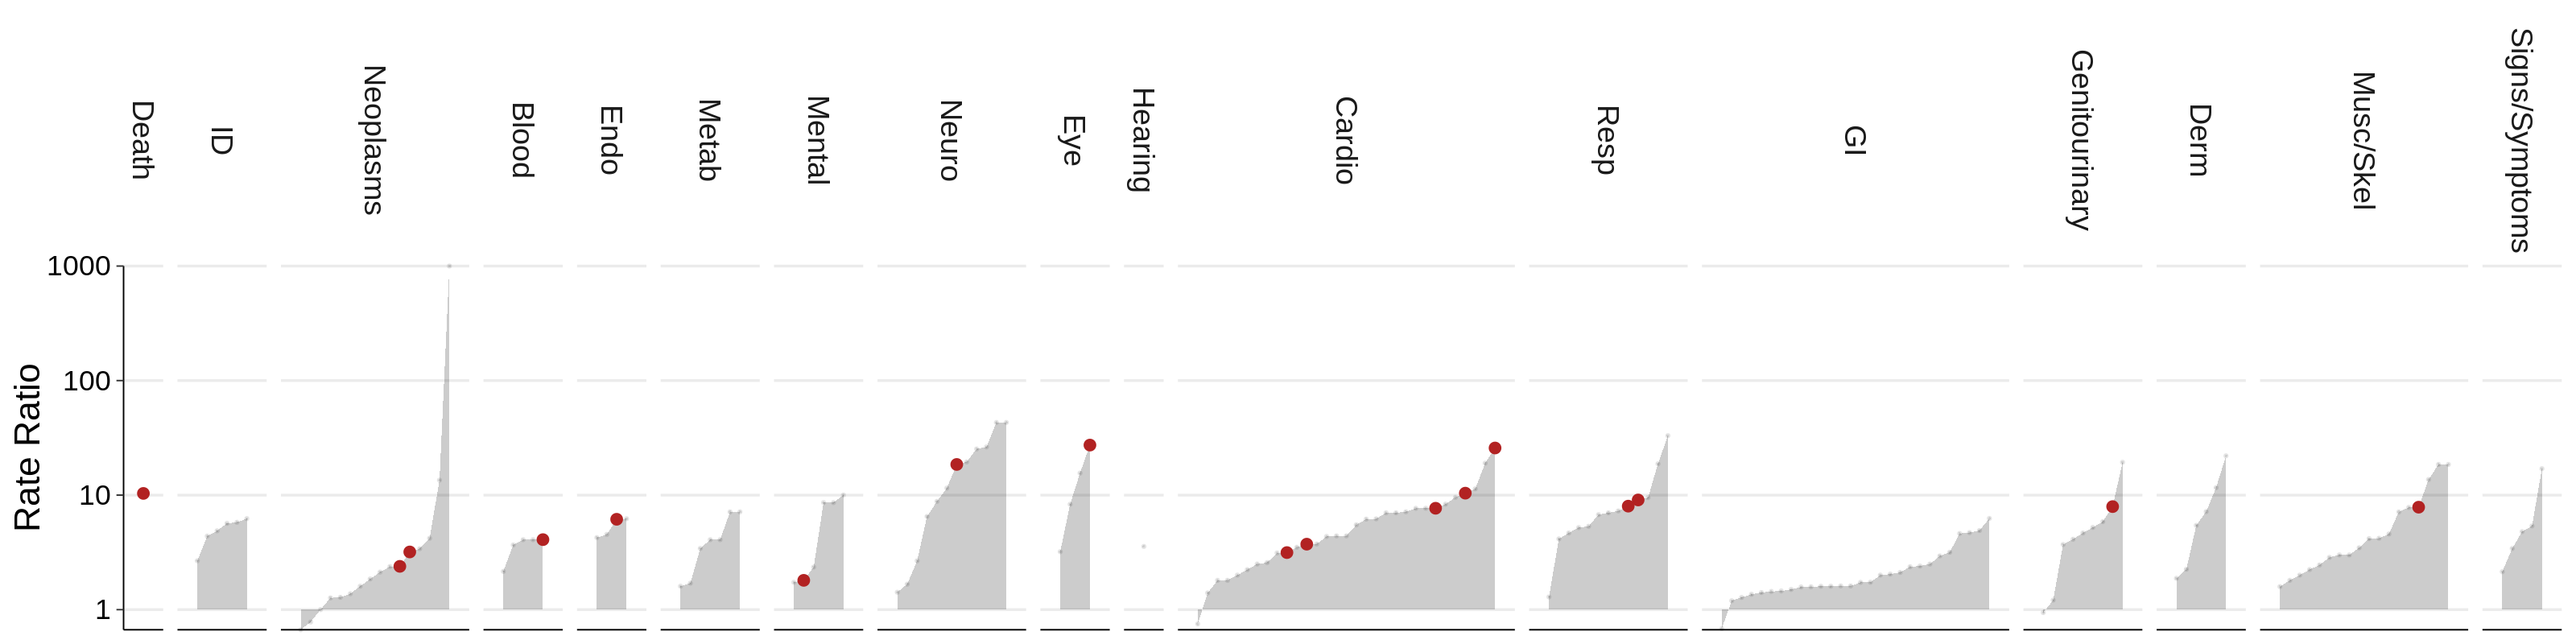

In [21]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

library(ggtext)
categories_sorted = (endpoints_md %>% arrange(endpoint) %>% distinct(phecode_category) %>% as_tibble())$phecode_category

temp_pos = ratio_df_complete %>%
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) 
#+    mutate(score = factor(score, levels=scores_plot)) %>%
#+    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
#+    ungroup() %>%
#+    pivot_wider(names_from=score, values_from=cindex) %>% 
#+    mutate(id = row_number()) %>%
#+    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
#+    group_by(endpoint, phecode_string, phecode_category) %>%
#+    summarise(delta = median(delta)) %>%
#+    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
#+    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    # %>%# %>% filter(endpoint %in% endpoint_sample)
#+    

endpoint_order = (temp_pos %>% arrange(event_rate_ratio))$endpoint

#index <- temp_pos$ratio < 0
#temp_pos$ratio[index] <- 0.


temp_pos = temp_pos %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number()) %>% mutate(log_ratio = log(event_rate_ratio))

#index <- temp_pos$log_ratio < 0
#temp_pos$log_ratio[index] <- 0.

overview = ggplot(temp_pos) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=log_ratio), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=log_ratio, color=highlight, size=highlight, alpha=highlight)) +
    #geom_text(data=temp_pos %>% filter(highlight=="YES"), aes(x=endpoint, y=log_ratio+0.5, label="↓", vjust=0), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y="Rate Ratio") +# (Top vs. Bottom 10%)")+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(NA, log(1000)), clip = "off")+
    scale_y_continuous(expand=c(0, 0), breaks=c(log(1), log(10), log(100), log(1000)), labels=c(1, 10, 100, 1000)) +
    #scale_y_continuous(, trans='log10')+
    scale_x_discrete(expand=expansion(add=2))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major.y=element_line(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") 
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)
overview

In [22]:
plot_name = "SupplFigure2a_EPIC_EventRates_PhenomeWide"
overview %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
overview %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
temp_pos %>% write_csv(glue("outputs/SupplFigure2a.csv"))

## Merge UKB / EPIC

In [37]:
endpoints_md_all = arrow::read_feather(glue("{project_path}/endpoints_md.feather"))

In [23]:
ukb = fread("ST3_EventRates_UKB.csv") %>% as_tibble() %>% 
    mutate(ratio = event_rate_ratio, n=rowSums(select(., starts_with("n_")))) %>% ungroup() %>% 
    select(phecode_category,  endpoint, n, starts_with("n_"), ratio) %>% left_join(endpoints_md_all %>% select(phecode_category, phecode_string, endpoint)) %>% arrange(endpoint) %>% #%>%
    select(phecode_category, endpoint, phecode_string, n, starts_with("n_"), ratio) %>% arrange(endpoint)
colnames(ukb)[4:15] = glue("ukb_{colnames(ukb)[4:15]}")
ukb

Joining with `by = join_by(phecode_category, endpoint)`


phecode_category,endpoint,phecode_string,ukb_n,ukb_n_1,ukb_n_2,ukb_n_3,ukb_n_4,ukb_n_5,ukb_n_6,ukb_n_7,ukb_n_8,ukb_n_9,ukb_n_10,ukb_ratio
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Death,OMOP_4306655,All-Cause Death,3490,59,84,148,213,249,309,386,530,646,866,14.6803625
ID,phecode_002,Staphylococcus,658,31,34,54,42,60,61,63,72,100,141,4.5491335
ID,phecode_002-1,Staphylococcus aureus,486,27,27,35,39,47,40,45,62,76,88,3.2592593
ID,phecode_003,Escherichia coli,959,57,62,82,72,88,98,96,139,129,136,2.3863577
ID,phecode_004,Streptococcus,494,33,26,30,38,50,40,58,62,74,83,2.5155667
ID,phecode_005,Mycobacteria,113,5,2,13,8,2,8,6,15,17,37,7.4012153
ID,phecode_007,Hemophilus infection,107,4,7,5,4,10,18,15,18,12,14,3.5000000
ID,phecode_007-1,Hemophilus influenzae,103,5,6,4,3,16,13,15,17,11,13,2.6004247
ID,phecode_008,Helicobacter [H. pylori],364,43,28,25,33,39,27,26,29,39,75,1.7444732


In [24]:
epic = temp_pos %>% mutate(phecode_string = endpoint_string, n=n_epic, ratio=event_rate_ratio) %>% select(phecode_category, phecode_string, n, starts_with("n_"), ratio, -n_epic) %>% ungroup()
colnames(epic)[3:14] = glue("epic_{colnames(epic)[3:14]}")
epic

phecode_category,phecode_string,epic_n,epic_n_1,epic_n_2,epic_n_3,epic_n_4,epic_n_5,epic_n_6,epic_n_7,epic_n_8,epic_n_9,epic_n_10,epic_ratio
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Neoplasms,Benign neoplasm of the digestive organs,361,30,40,27,35,35,35,36,32,27,20,0.6676245
GI,Other disorders of the intestines,313,22,22,28,34,42,38,27,42,25,15,0.6827744
Cardio,Hemorrhoids,145,12,17,15,18,16,15,18,13,12,9,0.7510359
Neoplasms,Secondary malignancy of lymph nodes,170,18,16,19,19,11,18,19,23,8,14,0.7788565
Genitourinary,Benign prostatic hyperplasia,435,33,27,29,30,28,46,36,50,43,31,0.9425783
Neoplasms,Benign neoplasm of the skin,104,9,6,13,11,12,10,9,12,10,9,1.0014025
GI,Other symptoms involving the digestive system and abdomen,527,41,60,65,63,49,45,45,48,44,49,1.1968029
Genitourinary,Hematuria,286,19,20,20,20,25,28,34,31,30,23,1.2122961
Neoplasms,Malignant neoplasm of male genitalia,247,19,19,17,25,19,18,32,20,27,24,1.2672065


In [25]:
st3_merged = ukb %>% left_join(epic, by=c("phecode_category", "phecode_string")) 

In [26]:
st3_merged

phecode_category,endpoint,phecode_string,ukb_n,ukb_n_1,ukb_n_2,ukb_n_3,ukb_n_4,ukb_n_5,ukb_n_6,⋯,epic_n_2,epic_n_3,epic_n_4,epic_n_5,epic_n_6,epic_n_7,epic_n_8,epic_n_9,epic_n_10,epic_ratio
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Death,OMOP_4306655,All-Cause Death,3490,59,84,148,213,249,309,⋯,0,6,8,3,14,11,20,15,31,10.347606
ID,phecode_002,Staphylococcus,658,31,34,54,42,60,61,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_002-1,Staphylococcus aureus,486,27,27,35,39,47,40,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_003,Escherichia coli,959,57,62,82,72,88,98,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_004,Streptococcus,494,33,26,30,38,50,40,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_005,Mycobacteria,113,5,2,13,8,2,8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_007,Hemophilus infection,107,4,7,5,4,10,18,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_007-1,Hemophilus influenzae,103,5,6,4,3,16,13,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_008,Helicobacter [H. pylori],364,43,28,25,33,39,27,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [27]:
st3_merged %>% write_csv("outputs/SupplTable3_ukbepic_merged.csv")

In [28]:
ukb %>% left_join(epic, by=c("phecode_category", "phecode_string"))

phecode_category,endpoint,phecode_string,ukb_n,ukb_n_1,ukb_n_2,ukb_n_3,ukb_n_4,ukb_n_5,ukb_n_6,⋯,epic_n_2,epic_n_3,epic_n_4,epic_n_5,epic_n_6,epic_n_7,epic_n_8,epic_n_9,epic_n_10,epic_ratio
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Death,OMOP_4306655,All-Cause Death,3490,59,84,148,213,249,309,⋯,0,6,8,3,14,11,20,15,31,10.347606
ID,phecode_002,Staphylococcus,658,31,34,54,42,60,61,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_002-1,Staphylococcus aureus,486,27,27,35,39,47,40,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_003,Escherichia coli,959,57,62,82,72,88,98,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_004,Streptococcus,494,33,26,30,38,50,40,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_005,Mycobacteria,113,5,2,13,8,2,8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_007,Hemophilus infection,107,4,7,5,4,10,18,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_007-1,Hemophilus influenzae,103,5,6,4,3,16,13,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ID,phecode_008,Helicobacter [H. pylori],364,43,28,25,33,39,27,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
